In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs

import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings('ignore')

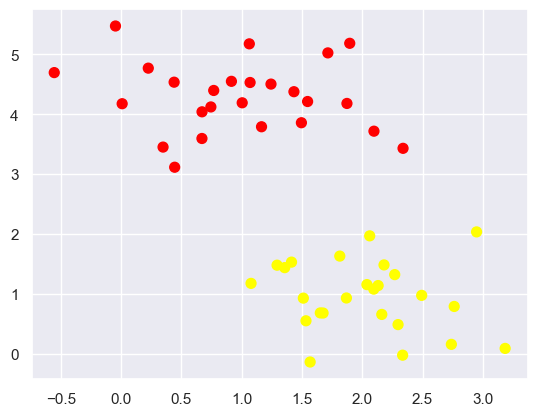

In [2]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

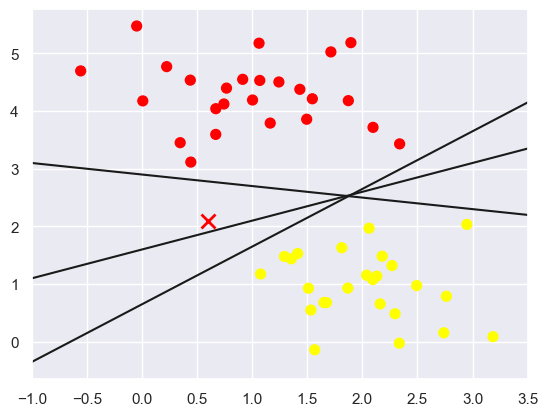

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

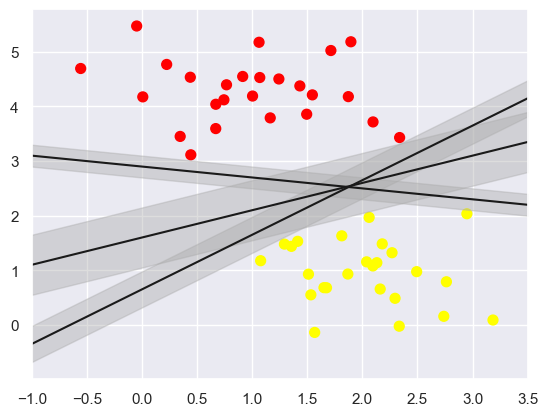

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

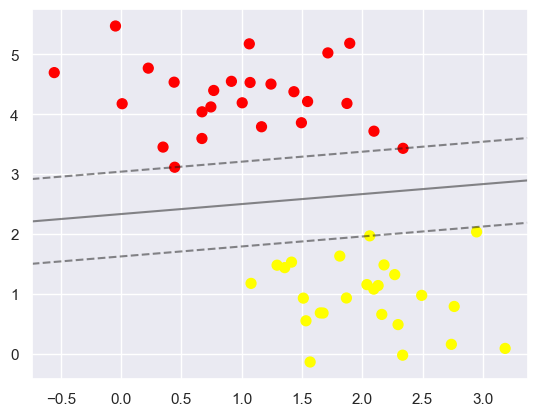

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

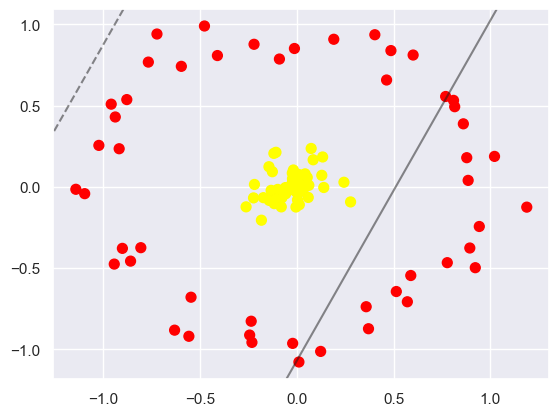

In [9]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [10]:
r = np.exp(-(X ** 2).sum(1))

In [11]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

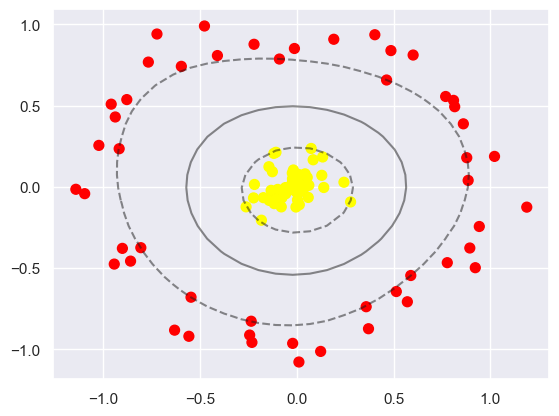

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

In [14]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print (X_iris.shape)
print (y_iris.shape)

print ('Test  1: {}, 2: {}, 3: {}'.format(np.sum(y_iris == 0), np.sum(y_iris == 1), np.sum(y_iris == 2) ) )
print ('Train 1: {}, 2: {}, 3: {}'.format(np.sum(y_iris == 0), np.sum(y_iris == 1), np.sum(y_iris == 2) ) )

(150, 4)
(150,)
Test  1: 50, 2: 50, 3: 50
Train 1: 50, 2: 50, 3: 50


In [15]:
a = X_iris[:,0]
b = X_iris[:,1]
c = X_iris[:,2]
d = X_iris[:,3]


scaler = StandardScaler()
scaler.fit_transform (X_iris,y_iris)
X_scaled = scaler.transform (X_iris)


X_squares   =  np.vstack (([a**2], [b**2], [c **2], [d**2])).T

X_multi = np.vstack ((a*b, a*c, a*d, b*c, b*d, c*d)).T

transform = PolynomialFeatures(10)
transform.fit_transform(X_iris)
X_poly = transform.transform(X_iris)

In [16]:
(X_tr_o, X_ts_o, y_tr_o, y_ts_o ) = train_test_split(X_iris, y_iris, stratify=y_iris, test_size= 0.3)
(X_tr_sc, X_ts_sc, y_tr_sc, y_ts_sc) = train_test_split(X_scaled, y_iris, stratify = y_iris, test_size = 0.30)
(X_tr_p, X_ts_p, y_tr_p, y_ts_p ) = train_test_split(X_poly, y_iris, stratify=y_iris, test_size= 0.3)
(X_tr_sq, X_ts_sq, y_tr_sq, y_ts_sq ) = train_test_split(X_squares, y_iris, stratify = y_iris, test_size = 0.3)
(X_tr_m, X_ts_m, y_tr_m, y_ts_m ) = train_test_split(X_multi, y_iris, stratify = y_iris, test_size = 0.3)

In [17]:
estimator = LogisticRegression()
paramgrid = {'C': [0.01, 0.05, 0.1, 0.5, 1], 'penalty': ['l1','l2']}

In [18]:
optimizer = GridSearchCV(estimator, paramgrid, cv=10)

In [19]:
optimizer.fit(X_tr_o, y_tr_o)
predict = optimizer.best_estimator_.predict(X_ts_o)
z_o = accuracy_score(y_ts_o,predict)

optimizer.fit(X_tr_sc, y_tr_sc)
predict = optimizer.best_estimator_.predict(X_ts_sc)
z_sc = accuracy_score(y_ts_sc,predict)

optimizer.fit(X_tr_p, y_tr_p)
predict = optimizer.best_estimator_.predict(X_ts_p)
z_p = accuracy_score(y_ts_p,predict)

optimizer.fit(X_tr_sq, y_tr_sq)
predict = optimizer.best_estimator_.predict(X_ts_sq)
z_sq = accuracy_score(y_ts_sq,predict)

optimizer.fit(X_tr_m, y_tr_m)
predict = optimizer.best_estimator_.predict(X_ts_m)
z_m = accuracy_score(y_ts_m,predict)

In [20]:
print ('Accuracy score for original: {}'.format(  z_o) )
print ('Accuracy score for scaled: {}'.format (  z_sc) )
print ('Accuracy score for polynomial: {}'.format( z_p) )
print ('Accuracy score for squares: {}'.format( z_sq) )
print ('Accuracy score for multi: {}'.format(  z_m) )

Accuracy score for original: 0.9777777777777777
Accuracy score for scaled: 0.9777777777777777
Accuracy score for polynomial: 0.9777777777777777
Accuracy score for squares: 0.9555555555555556
Accuracy score for multi: 0.9555555555555556
